In [1]:
import pandas as pd
import numpy as np

In [2]:
train_labels = pd.read_csv('C:/Users/Deepthi Ghanta/Desktop/train_labels.csv')
train_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [3]:
train_data = pd.read_csv('C:/Users/Deepthi Ghanta/Desktop/train_20data.csv')
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,000d83d6da1c0d771f9ec471741b0dae476196bb05451b...,2017-11-25,0.893042,0.004913,0.008533,1.006008,0.002598,0.108220,0.004759,0.018418,...,NaN,NaN,NaN,0.004492,0.003849,0.006092,NaN,0.006330,0.009248,0.003376
1,00144998273d201cca895e6b7cf7f637abfbcff9fb59c7...,2018-03-14,0.546820,0.006621,0.002290,0.814611,0.001025,0.099194,0.005771,0.012086,...,NaN,NaN,NaN,0.003662,0.009344,0.000918,NaN,0.004311,0.003008,0.007651
2,000fbdd8416278a0be960edf1b06e37eaa94db5c3536fe...,2017-03-29,0.954630,0.005375,0.003157,0.819806,0.006619,0.288945,0.008748,0.001983,...,NaN,NaN,NaN,0.009542,0.007849,0.002408,NaN,0.000432,0.003763,0.007734
3,004d1fd5e19420d4c612ea8aa47cc9f733ae1ea7db29df...,2017-12-02,0.958189,0.330027,0.163649,0.117390,0.002468,0.142566,0.008015,0.183648,...,NaN,NaN,NaN,1.006623,0.002293,0.864591,0.051842,1.006005,0.009436,0.276274
4,002415c4869a42f5abc32afc8949a79539166e976e3e73...,2017-04-24,0.442455,0.000827,0.062202,0.065600,0.006115,NaN,0.133592,0.269770,...,NaN,NaN,NaN,1.004467,0.004747,0.994760,0.625571,1.001804,0.484298,0.100622


In [4]:
#import pandas as pd
#import numpy as np

# Load your dataset into a DataFrame in chunks
#chunk_size = 10000  # Adjust the chunk size as needed
#selected_chunks = []

# Read the data in chunks and select 20% of each chunk
#for chunk in pd.read_csv('train_data.csv', chunksize=chunk_size):
    #random_chunk = chunk.sample(frac=0.15, random_state=66)  # Adjust random_state if needed
    #selected_chunks.append(random_chunk)

# Concatenate the selected chunks into a single DataFrame
#random_20_percent = pd.concat(selected_chunks)



In [5]:
#random_20_percent.to_csv('train_20data.csv', index=False)

In [6]:
# Randomly scale sample 20% of the train_labels dataset
train_labels_sample = train_labels.sample(frac=0.2, random_state=9)

# Merge the scaled data sample with train_data
train_merged = pd.merge(train_labels_sample, train_data, how='inner', on='customer_ID') # Assuming 'id' is the common column

# Save this data as a new file
train_merged.to_csv('train_sampled_1.csv', index=False)

In [7]:
import pandas as pd
# Load the merged data
data = pd.read_csv('train_sampled_1.csv')

# Check the size of the data
print(f"Data Size: {data.shape}")

# Check the data types of the features
print(f"Data Types:\n{data.dtypes}")

# Display the first 5 rows of the data to get a snapshot
print(f"Snapshot:\n{data.head()}")

print(data.head())

Data Size: (165902, 191)
Data Types:
customer_ID     object
target           int64
S_2             object
P_2            float64
D_39           float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 191, dtype: object
Snapshot:
                                         customer_ID  target         S_2  \
0  387634cceac79847949bb329e291b87bdb890d2be66aa3...       0  2018-02-11   
1  387634cceac79847949bb329e291b87bdb890d2be66aa3...       0  2017-06-19   
2  387634cceac79847949bb329e291b87bdb890d2be66aa3...       0  2017-03-31   
3  0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...       1  2017-12-04   
4  fca0564c7ffb5b6352ddd146fc89a1d222128eb2881832...       0  2018-02-03   

        P_2      D_39       B_1       B_2       R_1       S_3      D_41  ...  \
0  0.942790  0.068075  0.019834  1.008684  0.009693  0.111466  0.007938  ...   
1  0.897677  0.238288  0.026145  1.000461  0.002738  0.1

In [8]:
# Step 1: Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values Count: \n", missing_values)

# Step 2: Checking for duplicates
duplicates = data.duplicated().sum()
print("Duplicates Count: ", duplicates)

# If there are duplicates, you can drop them
if duplicates > 0:
    data = data.drop_duplicates()

Missing Values Count: 
 customer_ID         0
target              0
S_2                 0
P_2              1385
D_39                0
                ...  
D_141            3066
D_142          137293
D_143            3066
D_144            1233
D_145            3066
Length: 191, dtype: int64
Duplicates Count:  0


In [9]:
categorical_vars = []
for column in data.columns:
    if data[column].dtype == 'object':
        categorical_vars.append(column)

# Print the categorical variables
print("Categorical Variables:")
print(categorical_vars)

Categorical Variables:
['customer_ID', 'S_2', 'D_63', 'D_64']


In [10]:
columns_to_display = [ 'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Display the selected columns
selected_columns = data[columns_to_display]
print(selected_columns)

        B_30  B_38  D_114  D_116  D_117  D_120  D_126 D_63 D_64  D_66  D_68
0        0.0   2.0    1.0    0.0    3.0    0.0    1.0   CO    O   NaN   6.0
1        0.0   2.0    1.0    0.0    3.0    0.0    1.0   CO    O   NaN   6.0
2        0.0   2.0    1.0    0.0    3.0    0.0    1.0   CO    O   NaN   6.0
3        0.0   3.0    0.0    0.0    3.0    0.0    0.0   CR    U   NaN   4.0
4        0.0   2.0    1.0    0.0   -1.0    0.0    1.0   CO    U   NaN   6.0
...      ...   ...    ...    ...    ...    ...    ...  ...  ...   ...   ...
165897   0.0   1.0    NaN    NaN    NaN    NaN    NaN   CO  NaN   NaN   NaN
165898   0.0   2.0    NaN    NaN    NaN    NaN    NaN   CO  NaN   NaN   NaN
165899   0.0   2.0    NaN    NaN    NaN    NaN    NaN   CO    O   NaN   NaN
165900   0.0   5.0    0.0    0.0    3.0    1.0    1.0   CO    U   NaN   4.0
165901   0.0   5.0    0.0    0.0    3.0    1.0    1.0   CO    U   NaN   4.0

[165902 rows x 11 columns]


In [11]:
columns_to_encode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
encoded_data = pd.get_dummies(data, columns=columns_to_encode)

In [12]:
encoded_data.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,387634cceac79847949bb329e291b87bdb890d2be66aa3...,0,2018-02-11,0.942790,0.068075,0.019834,1.008684,0.009693,0.111466,0.007938,...,0,0,0,0,0,0,0,0,0,1
1,387634cceac79847949bb329e291b87bdb890d2be66aa3...,0,2017-06-19,0.897677,0.238288,0.026145,1.000461,0.002738,0.122203,0.002508,...,0,0,0,0,0,0,0,0,0,1
2,387634cceac79847949bb329e291b87bdb890d2be66aa3...,0,2017-03-31,0.891212,0.002531,0.016037,1.004369,0.007594,0.111369,0.000016,...,0,0,0,0,0,0,0,0,0,1
3,0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...,1,2017-12-04,0.156490,0.771685,0.031819,0.004404,0.500255,0.210282,0.481910,...,1,0,0,0,0,0,0,1,0,0
4,fca0564c7ffb5b6352ddd146fc89a1d222128eb2881832...,0,2018-02-03,0.993045,0.037904,0.043290,1.001212,0.000703,0.078677,0.007941,...,1,0,0,0,0,0,0,0,0,1


In [13]:
encoded_data.dtypes

customer_ID     object
target           int64
S_2             object
P_2            float64
D_39           float64
                ...   
D_68_2.0         uint8
D_68_3.0         uint8
D_68_4.0         uint8
D_68_5.0         uint8
D_68_6.0         uint8
Length: 225, dtype: object

In [14]:
# Assuming you have already one-hot encoded your DataFrame and it's stored in 'encoded_data'
# Convert one-hot encoded columns to boolean (True/False)
print(encoded_data[encoded_data.columns[encoded_data.columns.str.startswith(tuple(columns_to_encode))]].head())

   B_30_0.0  B_30_1.0  B_30_2.0  B_38_1.0  B_38_2.0  B_38_3.0  B_38_4.0  \
0         1         0         0         0         1         0         0   
1         1         0         0         0         1         0         0   
2         1         0         0         0         1         0         0   
3         1         0         0         0         0         1         0   
4         1         0         0         0         1         0         0   

   B_38_5.0  B_38_6.0  B_38_7.0  ...  D_64_U  D_66_0.0  D_66_1.0  D_68_0.0  \
0         0         0         0  ...       0         0         0         0   
1         0         0         0  ...       0         0         0         0   
2         0         0         0  ...       0         0         0         0   
3         0         0         0  ...       1         0         0         0   
4         0         0         0  ...       1         0         0         0   

   D_68_1.0  D_68_2.0  D_68_3.0  D_68_4.0  D_68_5.0  D_68_6.0  
0         0     

In [15]:
# Assuming you have a DataFrame named 'encoded_data' with boolean columns
# Get the unique values of boolean columns
unique_values = encoded_data.apply(lambda col: col.unique())

# Print the unique values
print(unique_values)


customer_ID    [387634cceac79847949bb329e291b87bdb890d2be66aa...
target                                                    [0, 1]
S_2            [2018-02-11, 2017-06-19, 2017-03-31, 2017-12-0...
P_2            [0.9427896768434596, 0.8976765021816182, 0.891...
D_39           [0.0680753771916979, 0.2382877078093956, 0.002...
                                     ...                        
D_68_2.0                                                  [0, 1]
D_68_3.0                                                  [0, 1]
D_68_4.0                                                  [0, 1]
D_68_5.0                                                  [0, 1]
D_68_6.0                                                  [1, 0]
Length: 225, dtype: object


In [16]:
numeric_columns = encoded_data.select_dtypes(include=np.float64).columns.tolist()
avg_data = encoded_data.groupby('customer_ID')[numeric_columns].mean()
avg_data 

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.873512,0.003067,0.008903,1.004783,0.001023,0.119332,0.004865,0.001811,NaN,0.093257,...,NaN,NaN,NaN,0.002242,0.007860,0.008730,NaN,0.002120,0.009568,0.003408
00013c6e1cec7c21bede7cb319f1e28eb994f5625257f479c53ad6e90c177f7c,0.316449,0.112251,0.102316,0.074927,0.170258,0.390836,0.148799,0.190892,0.290491,0.053086,...,NaN,NaN,NaN,0.007466,0.003879,0.002195,NaN,0.004588,0.002117,0.005045
00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b77900533c9bb36ec41f,0.665003,0.414795,0.031026,1.005464,0.003102,0.156805,0.006311,0.002545,NaN,0.193116,...,NaN,NaN,NaN,1.001422,0.007045,0.881233,0.117166,1.000145,0.338791,0.091536
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,0.937428,0.043295,0.024162,0.729565,0.004905,0.450104,0.004292,0.038068,NaN,0.210584,...,NaN,NaN,NaN,0.004723,0.004019,0.005953,NaN,0.005285,0.003284,0.004861
0004b8596c4946866d1b27a8b40488ecf49c6eae9c7bf4afcb6a8642b321124c,0.878375,0.004969,0.003371,0.816132,0.007532,0.235176,0.009166,0.011343,NaN,0.068150,...,NaN,NaN,NaN,0.005221,0.000509,0.003551,NaN,0.009621,0.005387,0.008473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffdc0cf228085b4275b38ebe6eb915766af3fecb2ae28f6ffa70f4e22d7029f,0.923003,0.211375,0.051033,0.892087,0.006563,0.039772,0.003018,0.011407,NaN,0.031342,...,NaN,NaN,NaN,0.002414,0.003231,0.006818,NaN,0.006231,0.008932,0.005811
fffdc3a28b2d17b4136b18ab6a554ccb3d98ec3a9305a0a64255dc7cf8711b40,0.677385,0.009731,0.050361,1.003722,0.005474,0.279133,0.007348,0.003697,0.018326,0.517158,...,NaN,NaN,NaN,0.004298,0.003620,0.007195,NaN,0.009687,0.005105,0.006437
fffec7d7e1ca804c86f1ffdaac389c33f8039ed35bf412b12d2e3548e49d54fa,0.700801,0.006999,0.007430,0.817144,0.003521,NaN,0.003683,0.004086,NaN,NaN,...,NaN,NaN,NaN,0.009939,0.009003,0.004755,NaN,0.006396,0.005561,0.003458


In [17]:
int_col = encoded_data.select_dtypes(include=np.int64).columns.tolist()
avg_int_data = encoded_data.groupby('customer_ID')[int_col].mean()
avg_int_data.head()

,target,B_31
customer_ID,,
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.0,1.0
00013c6e1cec7c21bede7cb319f1e28eb994f5625257f479c53ad6e90c177f7c,1.0,1.0
00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b77900533c9bb36ec41f,0.0,1.0
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,0.0,1.0
0004b8596c4946866d1b27a8b40488ecf49c6eae9c7bf4afcb6a8642b321124c,0.0,1.0


In [18]:
bin_col = encoded_data.select_dtypes(include=np.uint8).columns.tolist()
avg_bin_data = encoded_data.groupby('customer_ID')[bin_col].mean()
avg_bin_data

,B_30_0.0,B_30_1.0,B_30_2.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,1.000000,0.000000,0.00,0.0,1.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0
00013c6e1cec7c21bede7cb319f1e28eb994f5625257f479c53ad6e90c177f7c,0.666667,0.333333,0.00,0.0,0.00,0.00,1.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0
00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b77900533c9bb36ec41f,1.000000,0.000000,0.00,0.0,1.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,1.000000,0.000000,0.00,0.0,0.25,0.75,0.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0
0004b8596c4946866d1b27a8b40488ecf49c6eae9c7bf4afcb6a8642b321124c,1.000000,0.000000,0.00,0.0,1.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffdc0cf228085b4275b38ebe6eb915766af3fecb2ae28f6ffa70f4e22d7029f,1.000000,0.000000,0.00,0.0,0.50,0.50,0.00,0.0,0.0,0.0,...,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0
fffdc3a28b2d17b4136b18ab6a554ccb3d98ec3a9305a0a64255dc7cf8711b40,1.000000,0.000000,0.00,1.0,0.00,0.00,0.00,0.0,0.0,0.0,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0
fffec7d7e1ca804c86f1ffdaac389c33f8039ed35bf412b12d2e3548e49d54fa,1.000000,0.000000,0.00,1.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0


In [19]:
merge_data = pd.merge(avg_bin_data, avg_int_data, on='customer_ID')

new_data1 = pd.merge(merge_data, avg_data, on='customer_ID')

new_data1.head()

,B_30_0.0,B_30_1.0,B_30_2.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,1.000000,0.000000,0.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.002242,0.007860,0.008730,NaN,0.002120,0.009568,0.003408
00013c6e1cec7c21bede7cb319f1e28eb994f5625257f479c53ad6e90c177f7c,0.666667,0.333333,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.007466,0.003879,0.002195,NaN,0.004588,0.002117,0.005045
00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b77900533c9bb36ec41f,1.000000,0.000000,0.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.001422,0.007045,0.881233,0.117166,1.000145,0.338791,0.091536
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,1.000000,0.000000,0.0,0.0,0.25,0.75,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.004723,0.004019,0.005953,NaN,0.005285,0.003284,0.004861
0004b8596c4946866d1b27a8b40488ecf49c6eae9c7bf4afcb6a8642b321124c,1.000000,0.000000,0.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.005221,0.000509,0.003551,NaN,0.009621,0.005387,0.008473


In [20]:
new_data1.to_csv('new_data.csv', index=False)

In [21]:
new_data = pd.read_csv('new_data.csv')
print(new_data.head())

   B_30_0.0  B_30_1.0  B_30_2.0  B_38_1.0  B_38_2.0  B_38_3.0  B_38_4.0  \
0  1.000000  0.000000       0.0       0.0      1.00      0.00       0.0   
1  0.666667  0.333333       0.0       0.0      0.00      0.00       1.0   
2  1.000000  0.000000       0.0       0.0      1.00      0.00       0.0   
3  1.000000  0.000000       0.0       0.0      0.25      0.75       0.0   
4  1.000000  0.000000       0.0       0.0      1.00      0.00       0.0   

   B_38_5.0  B_38_6.0  B_38_7.0  ...  D_136  D_137  D_138     D_139     D_140  \
0       0.0       0.0       0.0  ...    NaN    NaN    NaN  0.002242  0.007860   
1       0.0       0.0       0.0  ...    NaN    NaN    NaN  0.007466  0.003879   
2       0.0       0.0       0.0  ...    NaN    NaN    NaN  1.001422  0.007045   
3       0.0       0.0       0.0  ...    NaN    NaN    NaN  0.004723  0.004019   
4       0.0       0.0       0.0  ...    NaN    NaN    NaN  0.005221  0.000509   

      D_141     D_142     D_143     D_144     D_145  
0  0.008

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test1, Y_train, Y_test1 = train_test_split(new_data1.drop('target', axis=1), new_data1['target'], test_size=0.3, random_state=45)
X_test1, X_test2, Y_test1, Y_test2 = train_test_split(X_test1,Y_test1, test_size=0.5, random_state=45)

In [24]:
X_train.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test1.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test2.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)

In [25]:
X_train.shape

(54271, 222)

In [26]:
# check - it is a good practice to compare test and train samples to make sure they are not fundamentally different. 
# If so, we will get high variance even with a non-overfitted model.
# Here we compare bad rate in both samples.
print (sum(Y_train)/len(Y_train))
print (sum(Y_test1)/len(Y_test1))
print (sum(Y_test2)/len(Y_test2))

0.2537266680179101
0.25546001719690453
0.2543422184006879


In [27]:
print("X_test1 shape: ", X_test1.shape)
print("Y_test1 shape: ", Y_test1.shape)

X_test1 shape:  (11630, 222)
Y_test1 shape:  (11630,)


# XGBOOST

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
import xgboost as xgb

In [30]:
xgb_instance = xgb.XGBClassifier()

In [31]:
xgb_instance = xgb.XGBClassifier() # nothing inside paranthesis, meaning we are using default parameters, with 100 trees.

model_for_feature_selection = xgb_instance.fit(X_train,Y_train)
model_for_feature_selection


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
feature_importance = {'Feature':X_train.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance

,Feature,Importance
46,P_2,0.220019
48,B_1,0.048711
70,B_9,0.024949
63,D_48,0.012850
53,B_3,0.011854
...,...,...
36,D_66_0.0,0.000000
32,D_64_-1,0.000000
31,D_63_XZ,0.000000
30,D_63_XM,0.000000


In [33]:
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]

X1_train = X_train[final_features]
X1_test1 = X_test1[final_features]
X1_test2 = X_test2[final_features]
final_features

46          P_2
48          B_1
70          B_9
63         D_48
53          B_3
56         D_44
54         D_42
180        B_37
58         D_45
50          R_1
71          R_3
51          S_3
100        B_18
52         D_41
69         D_51
73          P_3
186       D_111
181        R_26
66          B_7
49          B_2
61         D_46
77         B_11
27      D_63_CO
207       D_132
5      B_38_3.0
81          S_7
57          B_4
68         D_50
185       D_110
55         D_43
64         D_49
Name: Feature, dtype: object

In [34]:
model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
##feature_importance = model.feature_importances_

s_feature_importance = {'Feature':X_train.columns,'Importance':model.feature_importances_}
s_feature_importance = pd.DataFrame(s_feature_importance)
s_feature_importance.sort_values("Importance", inplace=True,ascending=False)
s_feature_importance

,Feature,Importance
46,P_2,0.134368
63,D_48,0.047928
48,B_1,0.039025
54,D_42,0.013861
49,B_2,0.011797
...,...,...
3,B_38_1.0,0.000030
12,D_116_0.0,0.000016
147,D_87,0.000000
38,D_68_0.0,0.000000


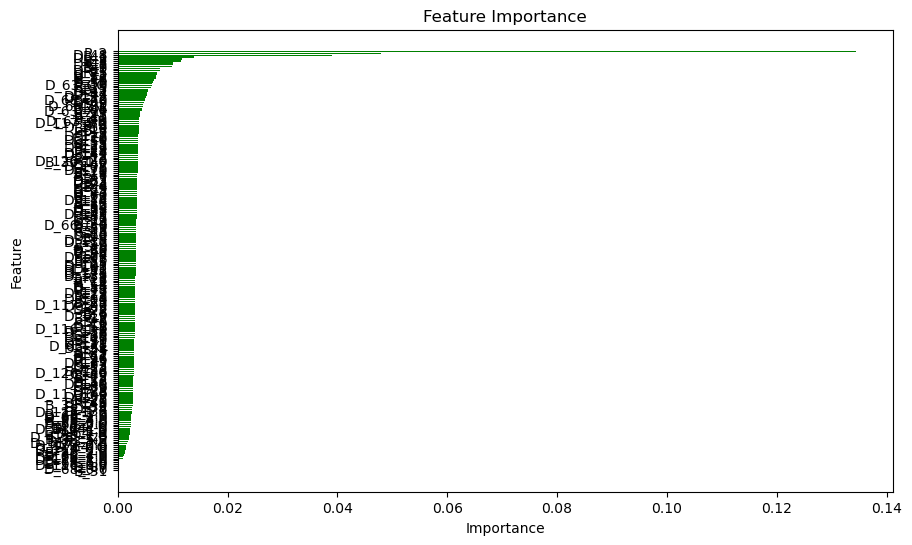

In [36]:
import matplotlib.pyplot as plt

# Assuming you have s_feature_importance DataFrame
plt.figure(figsize=(10, 6))
plt.barh(s_feature_importance['Feature'], s_feature_importance['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()


In [37]:
# choose featires with FI higher than 0.5%

final_features_1 = s_feature_importance["Feature"][s_feature_importance.Importance > 0.005]

X2_train = X_train[final_features_1]
X2_test1 = X_test1[final_features_1]
X2_test2 = X_test2[final_features_1]
final_features_1


46         P_2
63        D_48
48         B_1
54        D_42
49         B_2
51         S_3
58        D_45
81         S_7
70         B_9
93        D_61
71         R_3
117       D_75
108       B_22
69        D_51
100       B_18
187       B_39
68        D_50
27     D_63_CO
101       B_19
59         B_5
52        D_41
180       B_37
56        D_44
188      D_112
207      D_132
Name: Feature, dtype: object

In [38]:
merged_feature_importance = pd.concat([feature_importance, s_feature_importance], ignore_index=True)

# Group by 'Feature' and calculate the maximum importance across both models
max_importance = merged_feature_importance.groupby('Feature')['Importance'].max().reset_index()

# Filter features that have importance greater than 0.5% in either of the two models
filtered_features = max_importance[max_importance['Importance'] > 0.005]['Feature']

X3_train = X_train[filtered_features]
X3_test1 = X_test1[filtered_features]
X3_test2 = X_test2[filtered_features]

In [39]:
filtered_features

0           B_1
2          B_11
9          B_18
10         B_19
11          B_2
14         B_22
22          B_3
30         B_37
33     B_38_3.0
38         B_39
39          B_4
43          B_5
45          B_7
47          B_9
56        D_110
57        D_111
58        D_112
89        D_132
104        D_41
105        D_42
106        D_43
107        D_44
108        D_45
109        D_46
111        D_48
112        D_49
113        D_50
114        D_51
123        D_61
126     D_63_CO
151        D_75
170         P_2
171         P_3
173         R_1
191        R_26
194         R_3
216         S_3
219         S_7
Name: Feature, dtype: object

In [40]:
from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Trees", "Learning Rate","subsample","colsample_bytree","scale_pos_weight", "AUC Train", "AUC Test1","AUC Test2"])

row = 0
for num_trees in [50, 100, 300]:
  for LR in [0.01, 0.1]:
    for subsample in [0.5,0.8]:
        for colsample_bytree in [0.5,1.0]:
            for scale_pos_weight in [1,5,10]:
               xgb_instance = xgb.XGBClassifier(n_estimators=num_trees, learning_rate = LR,subsample=subsample,colsample_bytree=colsample_bytree,scale_pos_weight=scale_pos_weight)
               model = xgb_instance.fit(X3_train, Y_train)

               table.loc[row,"Num Trees"] = num_trees
               table.loc[row,"Learning Rate"] = LR
               table.loc[row,"subsample"] = subsample
               table.loc[row,"colsample_bytree"] = colsample_bytree
               table.loc[row,"scale_pos_weight"] = scale_pos_weight
               table.loc[row,"AUC Train"] = roc_auc_score(Y_train, model.predict_proba(X3_train)[:,1])
               table.loc[row,"AUC Test1"] = roc_auc_score(Y_test1, model.predict_proba(X3_test1)[:,1])
               table.loc[row,"AUC Test2"] = roc_auc_score(Y_test2, model.predict_proba(X3_test2)[:,1])



               row = row + 1

table

,Num Trees,Learning Rate,subsample,colsample_bytree,scale_pos_weight,AUC Train,AUC Test1,AUC Test2
0,50,0.01,0.5,0.5,1,0.93803,0.931121,0.928539
1,50,0.01,0.5,0.5,5,0.935886,0.92967,0.926543
2,50,0.01,0.5,0.5,10,0.934515,0.928932,0.92602
3,50,0.01,0.5,1.0,1,0.936198,0.928905,0.925657
4,50,0.01,0.5,1.0,5,0.933446,0.925838,0.922902
...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,5,0.982903,0.932892,0.930865
68,300,0.1,0.8,0.5,10,0.981245,0.93267,0.929311
69,300,0.1,0.8,1.0,1,0.986694,0.93433,0.931596
70,300,0.1,0.8,1.0,5,0.985667,0.933073,0.929144


In [41]:
# Define the thresholds
train_threshold = 0.85
difference_threshold = 0.05

# Initialize the best_auc as 0
best_auc = 0
# Initialize the best model as None
best_model = None

# Loop through each row in the dataframe
for index, row in table.iterrows():
    # Calculate the maximum difference between train AUC and test AUCs
    max_difference = max(abs(row['AUC Train'] - row['AUC Test1']), abs(row['AUC Train'] - row['AUC Test2']))
    
    # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
    if row['AUC Train'] > train_threshold and max_difference < difference_threshold:
        # Check if this model has a higher average AUC score on the test sets than the current best model
        average_test_auc = (row['AUC Test1'] + row['AUC Test2']) / 2
        if average_test_auc > best_auc:
            # Update the best_auc and best_model
            best_auc = average_test_auc
            best_model = row

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("No model found that satisfies the given conditions.")


Num Trees                100
Learning Rate            0.1
subsample                0.8
colsample_bytree         0.5
scale_pos_weight           1
AUC Train           0.961192
AUC Test1           0.936568
AUC Test2           0.932891
Name: 42, dtype: object


In [42]:
best_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0, scale_pos_weight=1)

# Fit the model on the training data
best_model = best_xgb.fit(X3_train, Y_train)

In [43]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
Y_train

customer_ID
9cf9bea5d91227086245c5113ed0afdadcca010474d0f8899dba1d261d1c44eb    0.0
08cf89dea4e08a84ad36b2edf09577a934080a521b09bba27a75a866803c6b54    1.0
cb916926f09348dc6c016d1e9f0ec2d61b6691bfa2d67644b36d587be7a42f4e    0.0
bd894e8f95c7932b917d55b0b5791c59a44f3ae9c01f60e26e4c217857d6af54    0.0
1d1b3dc55685969405db9f88624eff2042f646017d5995761ef848228ad8b384    0.0
                                                                   ... 
2a6d05798bd9d52b7b3898d264e6df539fd8d935751dfb5a6e1c18fa9c2f4baa    1.0
c98506cda60ed85456629b5d56d91402704c5f2ec96a88fc015fc18e96d05719    1.0
13abd1246e0f37d3271b1722d76539019ff734a923d6871c44e012ab2bec2ab3    0.0
d0e13e21eb53f5066a66c7a2a788374261eb4e16c00f793d1941a0e150ff1be7    0.0
157014d5b252b6452a2057ebf1b25d1104ee32ae70fd2ab54ff7e9ed381f1377    0.0
Name: target, Length: 54271, dtype: float64

In [45]:
perf_train_data = pd.DataFrame({"Actual": Y_train, "Prediction": best_model.predict_proba(X3_train)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)

perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00265]",0.0,5428,0.000000
"(0.00265, 0.00428]",3.0,5427,0.000553
"(0.00428, 0.00728]",8.0,5427,0.001474
"(0.00728, 0.0148]",22.0,5427,0.004054
"(0.0148, 0.0423]",74.0,5427,0.013636
"(0.0423, 0.147]",290.0,5427,0.053437
"(0.147, 0.381]",1094.0,5427,0.201585
"(0.381, 0.634]",2720.0,5427,0.501198
"(0.634, 0.827]",4337.0,5427,0.799152


In [46]:
stat = stat.reset_index()

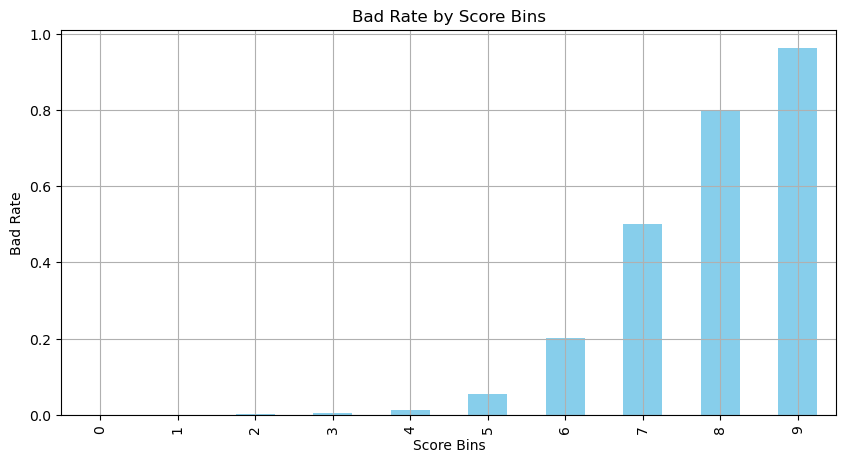

In [47]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 5))
stat['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()


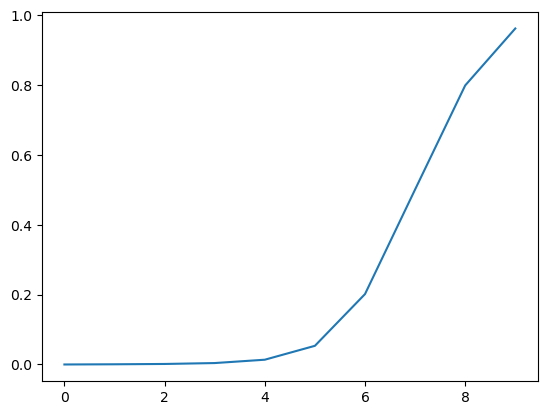

In [48]:


plt.plot(stat["Bad Rate"])

In [49]:
perf_test_data = pd.DataFrame({"Actual": Y_test1, "Prediction": best_model.predict_proba(X3_test1)[:,1]})

perf_test_data["Score Bins"] = pd.cut(perf_test_data["Prediction"], quantiles)
stat = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00265]",0.0,1179,0.000000
"(0.00265, 0.00428]",6.0,1139,0.005268
"(0.00428, 0.00728]",7.0,1112,0.006295
"(0.00728, 0.0148]",13.0,1162,0.011188
"(0.0148, 0.0423]",33.0,1177,0.028037
"(0.0423, 0.147]",132.0,1220,0.108197
"(0.147, 0.381]",333.0,1183,0.281488
"(0.381, 0.634]",602.0,1183,0.508876
"(0.634, 0.827]",847.0,1173,0.722080


In [50]:
perf_test_data = pd.DataFrame({"Actual": Y_test2, "Prediction": best_model.predict_proba(X3_test2)[:,1]})

perf_test_data["Score Bins"] = pd.cut(perf_test_data["Prediction"], quantiles)
stat = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00265]",3.0,1157,0.002593
"(0.00265, 0.00428]",3.0,1101,0.002725
"(0.00428, 0.00728]",9.0,1176,0.007653
"(0.00728, 0.0148]",18.0,1133,0.015887
"(0.0148, 0.0423]",37.0,1193,0.031014
"(0.0423, 0.147]",113.0,1215,0.093004
"(0.147, 0.381]",348.0,1206,0.288557
"(0.381, 0.634]",612.0,1184,0.516892
"(0.634, 0.827]",825.0,1156,0.713668


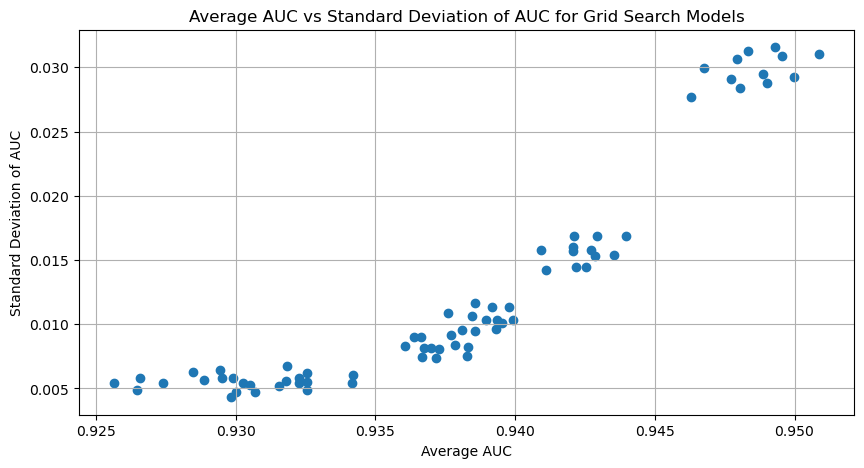

In [51]:
# Calculate average and standard deviation of AUCs
table['Average AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].mean(axis=1)
table['Standard Deviation AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC)
plt.figure(figsize=(10, 5))
plt.scatter(table['Average AUC'], table['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()

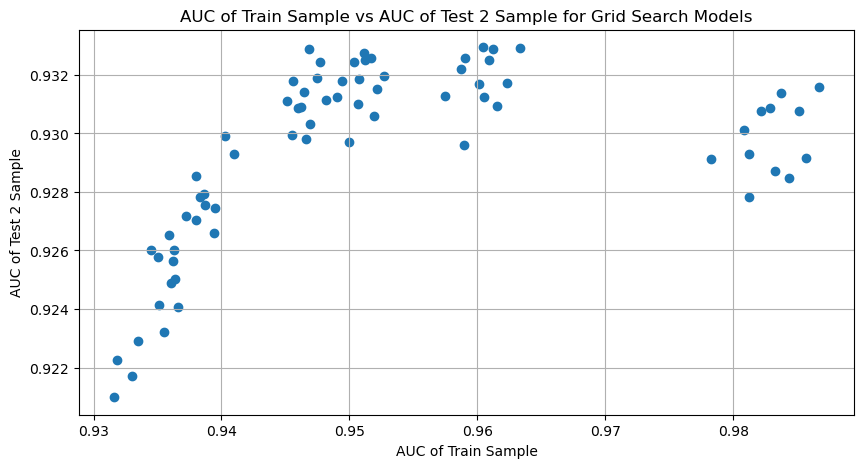

In [52]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(table['AUC Train'], table['AUC Test2'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()

In [53]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [54]:
import shap 
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [55]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X3_test2)


[07:23:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


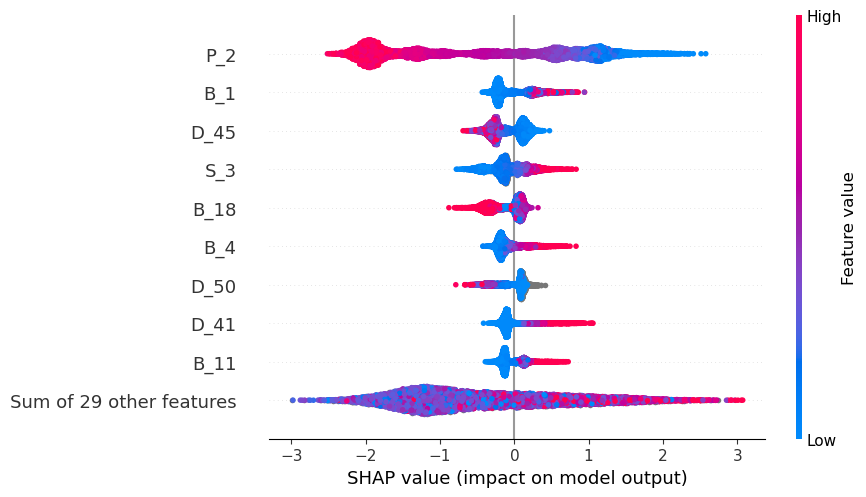

In [56]:
shap.plots.beeswarm(shap_values)

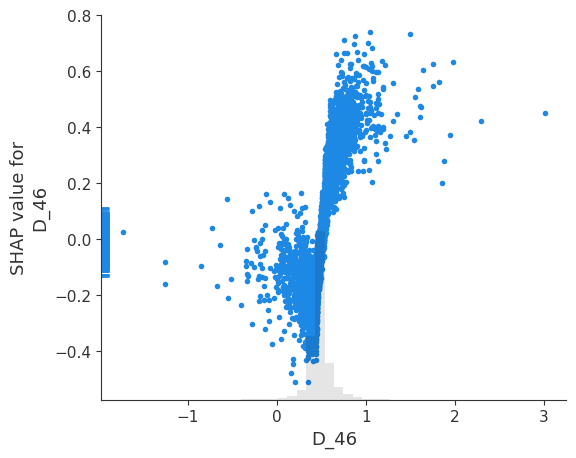

In [57]:
shap.plots.scatter(shap_values[:,"D_46"])

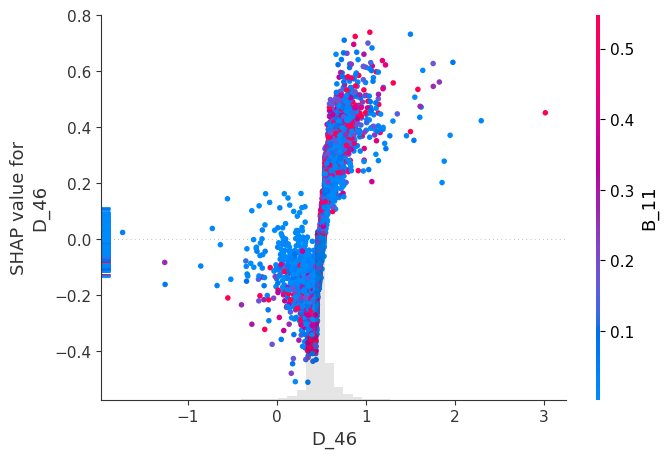

In [58]:
shap.plots.scatter(shap_values[:,"D_46"], color=shap_values[:,"B_11"])

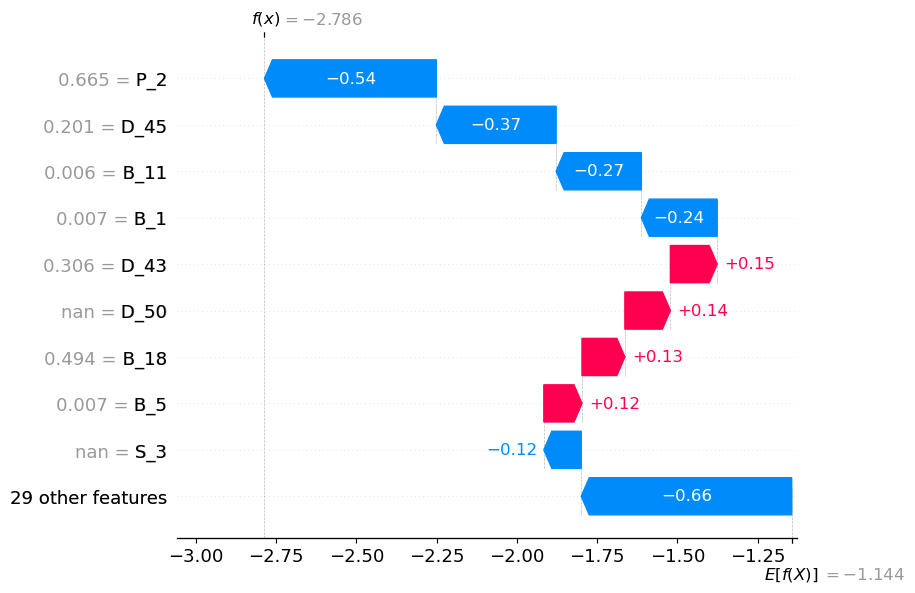

In [59]:
shap.plots.waterfall(shap_values[1100])

In [60]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])

 

# Subsetting X3_test1 with the columns of X3_train
X3_test1 = X3_test1[X3_train.columns]

 

# Predict default probabilities on the test set
predicted_default = best_model.predict_proba(X3_test1)[:, 1]

 

# Add predicted default probabilities and actual target to the test dataframe
X3_test1['predicted_default'] = predicted_default
X3_test1 = X3_test1.assign(target = Y_test1.values)

 

# Define the function that calculates default rate and expected revenue
def calculate_metrics(df, threshold):
    accepted_customers = df[df["predicted_default"] < threshold].copy()

    # Calculate portfolio default rate
    portfolio_default_rate = accepted_customers['target'].mean()

 

    # Calculate portfolio expected revenue
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()

    return portfolio_default_rate, portfolio_expected_revenue

 

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    default_rate, expected_revenue = calculate_metrics(X3_test1, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1, Default Rate: 0.019878603945371776, Expected Revenue: 1039.0476753182975
Threshold: 0.2, Default Rate: 0.03592405409097118, Expected Revenue: 1102.756793923127
Threshold: 0.3, Default Rate: 0.050415866922584776, Expected Revenue: 1136.5946438766337
Threshold: 0.4, Default Rate: 0.06769007615133567, Expected Revenue: 1161.252924389732
Threshold: 0.5, Default Rate: 0.08727606798346348, Expected Revenue: 1183.2212654128389


In [61]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])

 

# Subsetting X3_test1 with the columns of X3_train
X3_test2 = X3_test2[X3_train.columns]

 

# Predict default probabilities on the test set
predicted_default = best_model.predict_proba(X3_test2)[:, 1]

 

# Add predicted default probabilities and actual target to the test dataframe
X3_test2['predicted_default'] = predicted_default
X3_test2 = X3_test2.assign(target = Y_test2.values)

 

# Define the function that calculates default rate and expected revenue
def calculate_metrics(df, threshold):
    accepted_customers = df[df["predicted_default"] < threshold].copy()

    # Calculate portfolio default rate
    portfolio_default_rate = accepted_customers['target'].mean()

 

    # Calculate portfolio expected revenue
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()

    return portfolio_default_rate, portfolio_expected_revenue

 

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    default_rate, expected_revenue = calculate_metrics(X3_test2, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1, Default Rate: 0.019157670670518472, Expected Revenue: 1032.8982287942931
Threshold: 0.2, Default Rate: 0.036114911080711354, Expected Revenue: 1096.980142025973
Threshold: 0.3, Default Rate: 0.05162279580884232, Expected Revenue: 1134.6817122319599
Threshold: 0.4, Default Rate: 0.06894883270835854, Expected Revenue: 1158.7926972591843
Threshold: 0.5, Default Rate: 0.08781382551874355, Expected Revenue: 1178.7293418907993


In [62]:

X3_test2 = X3_test2[filtered_features]


# Generate predicted probabilities

default_predicted = best_model.predict_proba(X3_test2)[:, 1]

In [63]:




X3_test2['predicted_default'] = predicted_default

 


may17_jan18 = encoded_data[(encoded_data['S_2'] >= '2017-05-01') & (encoded_data['S_2'] <= '2018-01-31')]

mar17_apr17 = encoded_data[(encoded_data['S_2'] >= '2017-03-01') & (encoded_data['S_2'] <= '2017-04-30')]

feb18_apr18 = encoded_data[(encoded_data['S_2'] >= '2018-02-01') & (encoded_data['S_2'] <= '2018-04-30')]

 

may17_jan18["predicted_default"] = best_model.predict_proba(may17_jan18[filtered_features])[:, 1]

mar17_apr17["predicted_default"] = best_model.predict_proba(mar17_apr17[filtered_features])[:, 1]

feb18_apr18["predicted_default"] = best_model.predict_proba(feb18_apr18[filtered_features])[:, 1]



for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:

    print(f"Threshold: {threshold}")

    default_rate, expected_revenue = calculate_metrics(may17_jan18, threshold)

    print(f"May 2017 - Jan 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

 

    default_rate, expected_revenue = calculate_metrics(mar17_apr17, threshold)

    print(f"March 2017 - April 2017, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

 

    default_rate, expected_revenue = calculate_metrics(feb18_apr18, threshold)

    print(f"February 2018 - March 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Threshold: 0.1
May 2017 - Jan 2018, Default Rate: 0.01782355439597112, Expected Revenue: 10009.750109132421
March 2017 - April 2017, Default Rate: 0.024559680022454563, Expected Revenue: 2175.789322474006
February 2018 - March 2018, Default Rate: 0.010596026490066225, Expected Revenue: 2313.52698508734
Threshold: 0.2
May 2017 - Jan 2018, Default Rate: 0.0323131808800011, Expected Revenue: 10622.410342939393
March 2017 - April 2017, Default Rate: 0.0430019517723352, Expected Revenue: 2313.093847513226
February 2018 - March 2018, Default Rate: 0.01964530960769093, Expected Revenue: 2458.580275247304
Threshold: 0.3
May 2017 - Jan 2018, Default Rate: 0.04790197280997649, Expected Revenue: 10943.451140951349
March 2017 - April 2017, Default Rate: 0.060950474059242685, Expected Revenue: 2374.7557981007785
February 2018 - March 2018, Default Rate: 0.031143225228252955, Expected Revenue: 2532.332534789515
Threshold: 0.4
May 2017 - Jan 2018, Default Rate: 0.0652087186740652, Expected Revenue: 1

In [64]:

X3_test2 = X3_test2[filtered_features]

 

default_predicted_test2 = best_model.predict_proba(X3_test2)[:, 1]


X3_test2['predicted_default'] = default_predicted_test2

 


may17_jan18 = encoded_data[(encoded_data['S_2'] >= '2017-05-01') & (encoded_data['S_2'] <= '2018-01-31')]
mar17_apr17 = encoded_data[(encoded_data['S_2'] >= '2017-03-01') & (encoded_data['S_2'] <= '2017-04-30')]
feb18_apr18 = encoded_data[(encoded_data['S_2'] >= '2018-02-01') & (encoded_data['S_2'] <= '2018-04-30')]

 


may17_jan18["predicted_default"] = best_model.predict_proba(may17_jan18[filtered_features])[:, 1]
mar17_apr17["predicted_default"] = best_model.predict_proba(mar17_apr17[filtered_features])[:, 1]
feb18_apr18["predicted_default"] = best_model.predict_proba(feb18_apr18[filtered_features])[:, 1]

 

def calculate_defaults(encoded_data, threshold):
    
    encoded_data['is_defaulted'] = encoded_data['predicted_default'].apply(lambda x: 1 if x > threshold else 0)
    
    defaults = encoded_data['is_defaulted'].sum()
    return defaults

 

for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    defaults_may17_jan18 = calculate_defaults(may17_jan18, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {defaults_may17_jan18}")

 

    defaults_mar17_apr17 = calculate_defaults(mar17_apr17, threshold)
    print(f"March 2017 - April 2017, Number of defaulted customers: {defaults_mar17_apr17}")

 

    defaults_feb18_apr18 = calculate_defaults(feb18_apr18, threshold)
    print(f"February 2018 - March 2018, Number of defaulted customers: {defaults_feb18_apr18}")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Threshold: 0.1
May 2017 - Jan 2018, Number of defaulted customers: 48659
March 2017 - April 2017, Number of defaulted customers: 9726
February 2018 - March 2018, Number of defaulted customers: 12242
Threshold: 0.2



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


May 2017 - Jan 2018, Number of defaulted customers: 41424
March 2017 - April 2017, Number of defaulted customers: 8094
February 2018 - March 2018, Number of defaulted customers: 10595
Threshold: 0.3
May 2017 - Jan 2018, Number of defaulted customers: 36319
March 2017 - April 2017, Number of defaulted customers: 6996
February 2018 - March 2018, Number of defaulted customers: 9489
Threshold: 0.4
May 2017 - Jan 2018, Number of defaulted customers: 31864
March 2017 - April 2017, Number of defaulted customers: 5942
February 2018 - March 2018, Number of defaulted customers: 8514
Threshold: 0.5
May 2017 - Jan 2018, Number of defaulted customers: 27501
March 2017 - April 2017, Number of defaulted customers: 4947
February 2018 - March 2018, Number of defaulted customers: 7509
Threshold: 0.6
May 2017 - Jan 2018, Number of defaulted customers: 22809
March 2017 - April 2017, Number of defaulted customers: 3926
February 2018 - March 2018, Number of defaulted customers: 6444
Threshold: 0.7
May 2017 

In [65]:

X3_test2 = X3_test2[filtered_features]


default_predicted_test2 = best_model.predict_proba(X3_test2)[:, 1]

 

X3_test2['predicted_default'] = default_predicted_test2


encoded_data["predicted_default"] = best_model.predict_proba(encoded_data[filtered_features])[:, 1]


for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    num_defaults_mar17_mar18 = calculate_defaults(encoded_data, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {num_defaults_mar17_apr18}")

Threshold: 0.1
May 2017 - Jan 2018, Number of defaulted customers: 70627
Threshold: 0.2
May 2017 - Jan 2018, Number of defaulted customers: 60113
Threshold: 0.3
May 2017 - Jan 2018, Number of defaulted customers: 52804
Threshold: 0.4
May 2017 - Jan 2018, Number of defaulted customers: 46320
Threshold: 0.5
May 2017 - Jan 2018, Number of defaulted customers: 39957
Threshold: 0.6
May 2017 - Jan 2018, Number of defaulted customers: 33179
Threshold: 0.7
May 2017 - Jan 2018, Number of defaulted customers: 25739
Threshold: 0.8
May 2017 - Jan 2018, Number of defaulted customers: 17256
Threshold: 0.9
May 2017 - Jan 2018, Number of defaulted customers: 7848


# Neural

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [67]:
X_train_standard = sc.transform(X_train)
X_test1_standard = sc.transform(X_test1)
X_test2_standard = sc.transform(X_test2)

In [68]:
X_train_normalized = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_standard, columns=X_test1.columns)
X_test2_normalized = pd.DataFrame(X_test2_standard, columns=X_test2.columns)

In [69]:
X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
B_30_0.0,54271.0,-2.692885e-15,1.000009,-2.616110,-2.616110,0.451725,0.451725,0.451725
B_30_1.0,54271.0,1.612422e-17,1.000009,-0.430736,-0.430736,-0.430736,2.723455,2.723455
B_30_2.0,54271.0,2.503596e-15,1.000009,-0.128411,-0.128411,-0.128411,6.138311,12.405032
B_38_1.0,54271.0,-7.190643e-17,1.000009,-0.554540,-0.554540,-0.554540,1.974080,1.974080
B_38_2.0,54271.0,-5.379092e-16,1.000009,-0.762365,-0.762365,-0.762365,1.430120,1.430120
...,...,...,...,...,...,...,...,...
D_141,53580.0,-5.403065e-17,1.000009,-0.478111,-0.477223,-0.461947,2.413588,3.022864
D_142,9615.0,7.730570e-17,1.000052,-1.661763,-1.596113,-0.047564,2.606514,7.144986
D_143,53580.0,-3.902150e-17,1.000009,-0.477553,-0.476698,-0.462717,2.187714,2.191128
D_144,54009.0,9.680148e-17,1.000009,-0.291865,-0.290278,-0.262130,5.240265,7.259128


In [70]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a function to cap and floor values
def cap_floor_values(df, lower_percentile, upper_percentile):
    for col in df.columns:
        lower_value = df[col].quantile(lower_percentile)
        upper_value = df[col].quantile(upper_percentile)
        df[col] = np.where(df[col] < lower_value, lower_value, df[col])
        df[col] = np.where(df[col] > upper_value, upper_value, df[col])
    return df

# Define a function to preprocess the data
def preprocess_data(df, scaler=None, lower_percentile=0.01, upper_percentile=0.99):
    # Apply cap and floor on the data
    df_normalized = cap_floor_values(df, lower_percentile, upper_percentile)
    
    # Replace missing values with 0
    df_normalized = df_normalized.fillna(0)
    
    if scaler is None:
        # Initialize the scaler based on the data
        scaler = StandardScaler().fit(df_normalized)
    
    # Standardize the data
    df_normalized = scaler.transform(df_normalized)
    
    return df_normalized, scaler

# Apply the preprocess_data method on the train set
X_train_normalized, scaler = preprocess_data(X_train)

# Apply the preprocess_data method on test set 1
X_test1_normalized, _ = preprocess_data(X_test1, scaler)

# Apply the preprocess_data method on test set 2
X_test2_normalized, _ = preprocess_data(X_test2, scaler)

In [71]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized, columns=X_test1.columns)
X_test2_normalized = pd.DataFrame(X_test2_normalized, columns=X_test2.columns)

In [72]:
X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
B_30_0.0,54271.0,-2.692885e-15,1.000009,-2.616110,-2.616110,0.451725,0.451725,0.451725
B_30_1.0,54271.0,1.612422e-17,1.000009,-0.430736,-0.430736,-0.430736,2.723455,2.723455
B_30_2.0,54271.0,6.458151e-15,1.000009,-0.140374,-0.140374,-0.140374,8.317483,8.317483
B_38_1.0,54271.0,-7.190643e-17,1.000009,-0.554540,-0.554540,-0.554540,1.974080,1.974080
B_38_2.0,54271.0,-5.379092e-16,1.000009,-0.762365,-0.762365,-0.762365,1.430120,1.430120
...,...,...,...,...,...,...,...,...
D_141,54271.0,3.925907e-17,1.000009,-0.474520,-0.474520,-0.458379,2.436339,2.436950
D_142,54271.0,3.622750e-15,1.000009,-0.385335,-0.385335,-0.385335,3.851047,5.311782
D_143,54271.0,1.870181e-17,1.000009,-0.473823,-0.473823,-0.459051,2.204759,2.204791
D_144,54271.0,-2.589859e-17,1.000009,-0.298030,-0.296351,-0.266684,5.547097,5.550395


In [73]:
pip install --upgrade tensorflow


  Using cached numpy-1.26.0-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Deepthi Ghanta\\anaconda3\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [74]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [75]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import roc_auc_score

def create_model(num_hidden_layers, num_nodes, activation_fn, dropout_rate):
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=X3_train.shape[1], activation=activation_fn))  # first layer needs input dimension

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_nodes, activation=activation_fn))
        if dropout_rate < 1.0:
            model.add(Dropout(1-dropout_rate))  # Dropout rate in keras is the fraction to drop

    model.add(Dense(units=1, activation='sigmoid'))  # Output layer

    optimizer = Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

    return model

# empty list to hold results
results = []

# grid search parameters
num_layers = [2, 4]
num_nodes = [4, 6]
activations = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]
batch_sizes = [100, 10000]
epochs = 20

for layers in num_layers:
    for nodes in num_nodes:
        for activation in activations:
            for dropout_rate in dropout_rates:
                for batch_size in batch_sizes:
                    model = create_model(layers, nodes, activation, dropout_rate)
                    history = model.fit(X3_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # predict probabilities for train set
                    proba_train = model.predict(X3_train).ravel()

                    # compute AUC for train set
                    auc_train = roc_auc_score(Y_train, proba_train)

                    # predict probabilities for test1
                    proba_test1 = model.predict(X3_test1).ravel()

                    # compute AUC for test1
                    auc_test1 = roc_auc_score(Y_test1, proba_test1)

                    # predict probabilities for test2
                    proba_test2 = model.predict(X3_test2).ravel()

                    # compute AUC for test2
                    auc_test2 = roc_auc_score(Y_test2, proba_test2)

                    # save the results
                    results.append({
                        'num_layers': layers,
                        'num_nodes': nodes,
                        'activation': activation,
                        'dropout_rate': dropout_rate,
                        'batch_size': batch_size,
                        'train_auc': auc_train,
                        'test1_auc': auc_test1,
                        'test2_auc': auc_test2
                    })

# convert results to a DataFrame
results_data = pd.DataFrame(results)


In [ ]:
results_data

In [ ]:
def find_best_model(results_data, train_threshold=0.85, difference_threshold=0.05):
    # Initialize the best_auc as 0
    best_auc = 0
    # Initialize the best model as None
    best_model = None

    # Loop through each row in the dataframe
    for index, row in results_data.iterrows():
        # Calculate the maximum difference between train AUC and test AUCs
        max_difference = max(abs(row['train_auc'] - row['test1_auc']), abs(row['train_auc'] - row['test2_auc']))

        # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
        if row['train_auc'] > train_threshold and max_difference < difference_threshold:
            # Check if this model has a higher average AUC score on the test sets than the current best model
            average_test_auc = (row['test1_auc'] + row['test2_auc']) / 2
            if average_test_auc > best_auc:
                # Update the best_auc and best_model
                best_auc = average_test_auc
                best_model = row

    return best_model

# Assuming you have the results_data DataFrame and the defined thresholds train_threshold and difference_threshold
# You can call the method as follows:
best_model = find_best_model(results_data, train_threshold=0.85, difference_threshold=0.05)

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("There was no model discovered that satisfied the required conditions.")


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


# Create the model with the optimal parameters
model = Sequential()
model.add(Dense(6, input_dim=X3_train.shape[1], activation='relu'))

for _ in range(4 - 1):  # subtract 1 because we already added the first layer
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.0))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

# Fit the model
model.fit(X3_train, Y_train, epochs=20, batch_size=100, verbose=1)

# Save the model
model.save('final_model.h5')


In [ ]:
import matplotlib.pyplot as plt
# Calculate average and standard deviation of AUCs
results_data['Average AUC'] = results_data[['train_auc', 'test1_auc', 'test2_auc']].mean(axis=1)
results_data['Standard Deviation AUC'] = results_data[['train_auc', 'test1_auc', 'test2_auc']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC)
plt.figure(figsize=(10, 5))
plt.scatter(results_data['Average AUC'], results_data['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()

In [ ]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(results_data['train_auc'], results_data['test2_auc'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Compute predicted probabilities
prob_train = model.predict(X3_train)
prob_test1 = model.predict(X3_test1)
prob_test2 = model.predict(X3_test2)

# Create score bins based on train sample predictions
quantiles = pd.qcut(prob_train.flatten(), q=10, precision=3, retbins=True, duplicates='drop')[1]

# Function to compute bad rates and plot bar chart
def compute_bad_rate_chart(y_true, y_pred, quantiles, set_name):
    dd = pd.DataFrame({"Actual": y_true, "Prediction": y_pred.flatten()})
    dd["Score Bins"] = pd.cut(dd["Prediction"], bins=quantiles, include_lowest=True)
    stat = dd.groupby("Score Bins")["Actual"].mean()

    stat.plot(kind='bar', title=f'Bad Rates by Score Bin ({set_name})')
    plt.ylabel('Bad Rate')
    plt.show()

# Compute bad rates and plot bar chart for each set
compute_bad_rate_chart(Y_train, prob_train, quantiles, 'Train')
compute_bad_rate_chart(Y_test1, prob_test1, quantiles, 'Test1')
compute_bad_rate_chart(Y_test2, prob_test2, quantiles, 'Test2')


In [ ]:
def compute_bad_rate_chart(y_true, y_pred, quantiles):
    # Create a DataFrame with the actual outcomes and predicted probabilities
    dd = pd.DataFrame({'Actual': y_true, 'Prediction': y_pred.flatten()})

    # Apply the score bins to the DataFrame
    dd['Score Bin'] = pd.cut(dd['Prediction'], bins=quantiles, include_lowest=True)

    # Compute the bad rates in each bin
    dd['Bad Rate']= dd.groupby('Score Bin')['Actual'].transform('mean')

    return dd.drop_duplicates('Score Bin')

# Compute bad rates for each set
compute_train = compute_bad_rate_chart(Y_train, prob_train, quantiles)
compute_test1 = compute_bad_rate_chart(Y_test1, prob_test1, quantiles)
compute_test2 = compute_bad_rate_chart(Y_test2, prob_test2, quantiles)

print('Rank Ordering:')
print(compute_train)

In [ ]:
# Compute predicted probabilities for Neural Network
Y_train_pred_nn = model.predict(X3_train)

# Create DataFrame with actual and predicted values
perf_train_data_nn = pd.DataFrame({"Actual": Y_train, "Prediction": Y_train_pred_nn.flatten()})

# Define score bins based on the quantiles of predictions
quantiles_nn = list(set(perf_train_data_nn.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles_nn.sort()
quantiles_nn.insert(0,0)
quantiles_nn.insert(len(quantiles_nn),1)

# Apply score bins to the DataFrame
perf_train_data_nn["Score Bins"] = pd.cut(perf_train_data_nn["Prediction"], quantiles_nn)

# Compute "Bad Rate" (default rate) in each bin
stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat_nn["Bad Rate"] = stat_nn["sum"] / stat_nn["count"]

# Print "Bad Rate" for each score bin
print(stat_nn)


In [ ]:
stat_nn = stat_nn.reset_index()

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat_nn['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()


In [ ]:
# Compute predicted probabilities for Neural Network
Y_train_pred_nn = model.predict(X3_test1)

# Create DataFrame with actual and predicted values
perf_train_data_nn = pd.DataFrame({"Actual": Y_test1, "Prediction": Y_train_pred_nn.flatten()})

# Define score bins based on the quantiles of predictions
quantiles_nn = list(set(perf_train_data_nn.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles_nn.sort()
quantiles_nn.insert(0,0)
quantiles_nn.insert(len(quantiles_nn),1)

# Apply score bins to the DataFrame
perf_train_data_nn["Score Bins"] = pd.cut(perf_train_data_nn["Prediction"], quantiles_nn)

# Compute "Bad Rate" (default rate) in each bin
stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat_nn["Bad Rate"] = stat_nn["sum"] / stat_nn["count"]

# Print "Bad Rate" for each score bin
print(stat_nn)


In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat_nn['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()